# Decision Tree Classification

In [808]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [809]:
df = pd.read_csv("C:/Users/redye/MASTERS YORK/Data Mining/DecisionTreeClassification - Data/DT classifier_training_data activity 3.6.csv")

In [810]:
# using apply function to create new columns containing categorisation of Age, Licence and Polcy
df['Licence < 4'] = df.apply(lambda row: row['Age of Licence'] <4, axis =1)
df['Policy < 1']  = df.apply(lambda row: row['Age of Policy'] <1, axis =1)

In [811]:
age_bins = [0, 24, 74, int()]
age_names = [0, 1, 2]
df['Age of Driver'] = pd.cut(df['Age of Driver'], aod_bins, labels=aod_names, include_lowest=True)
claims_bins = [0, 1, 2, 3, float("inf")]
claims_names = [0,1,2,3]
df['First Party Claims'] = pd.cut(df['First Party Claims'], claims_bins, labels=claims_names, include_lowest=True)
df['Other Claims'] = pd.cut(df['Other Claims'], claims_bins, labels=claims_names, include_lowest=True)

In [812]:
# reorder the columns with the dependent variables as the last three columns
column_names = ['Age of Driver', 'Licence < 4', 'Policy < 1', 'First Party Claims', 'Other Claims', 
                'Unspent Convictions', 'No Claims Protection', 'Good Driver']
df = df.reindex(columns=column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age of Driver         24 non-null     category
 1   Licence < 4           24 non-null     bool    
 2   Policy < 1            24 non-null     bool    
 3   First Party Claims    24 non-null     category
 4   Other Claims          24 non-null     category
 5   Unspent Convictions   24 non-null     object  
 6   No Claims Protection  24 non-null     object  
 7   Good Driver           16 non-null     object  
dtypes: bool(2), category(3), object(3)
memory usage: 1.3+ KB


In [813]:
df

,Age of Driver,Licence < 4,Policy < 1,First Party Claims,Other Claims,Unspent Convictions,No Claims Protection,Good Driver
0,1,True,False,0,0,N,Y,N
1,0,True,True,1,0,N,Y,N
2,1,False,False,0,0,Y,N,N
3,1,False,False,0,0,N,N,N
4,1,False,False,1,0,N,Y,N
5,1,False,False,0,3,Y,N,N
6,1,False,False,0,1,N,Y,N
7,1,False,False,0,0,N,N,Y
8,2,True,False,0,0,N,Y,N
9,1,False,False,0,0,Y,N,N


In [814]:
# split into independent and dependent variable
X_train = df.iloc[:16, 0:-1].values
y_train = df.iloc[:16, -1:].values
X_test = df.iloc[16:, 0:-1].values
y_test = df.iloc[16:, -1:].values

In [815]:
# Encode all of the columns as binary cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(7):
    X_train[:,i] = le.fit_transform(X_train[:,i])
    X_test[:,i] = le.fit_transform(X_test[:,i])

In [816]:
## Encode the dependent variables
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
print(X_test)


[[1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1]
 [0 1 1 1 0 0 0]
 [1 0 0 0 0 1 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 1]
 [0 0 0 0 2 0 0]
 [1 0 1 0 0 1 0]]


C:\Users\redye\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [817]:
# Train the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [818]:
parameters = {'min_samples_split':range(2,5), 'max_depth':range(2,6), 'min_samples_leaf': range(1,4)}
classifier = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1, cv = 4, scoring="accuracy")
classifier = classifier.fit(X_train, y_train)

In [819]:
print('GridSearchCV classifier score', classifier.score(X_train, y_train))
tree_model = classifier.best_estimator_
print (classifier.best_params_)

GridSearchCV classifier score 0.875
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}


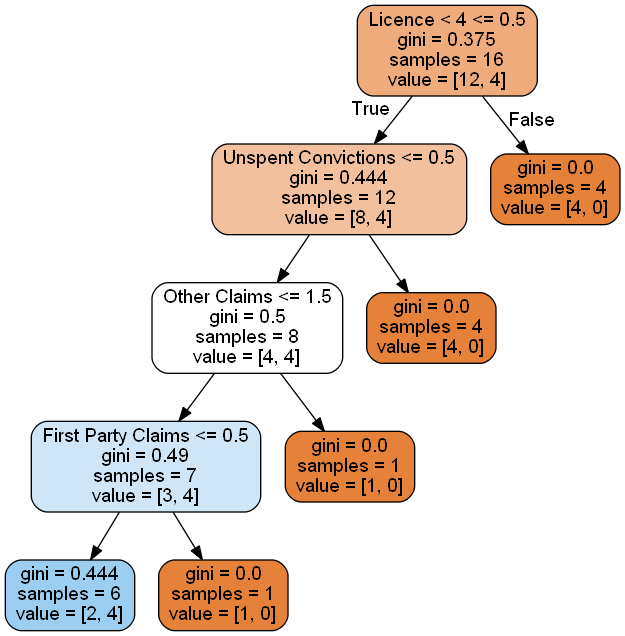

In [820]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree_model, out_file=None, feature_names=df.columns[0:-1], filled=True, rounded=True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

In [821]:
# Test the accuracy on the training data

In [822]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 0 0]


In [823]:
# Test the accuracy on the test data

In [824]:
y_pred = classifier.predict(X_train)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_train.reshape(len(y_train),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print(cm)
print("Accuracy Score: ")
print(accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]
[[10  2]
 [ 0  4]]
Accuracy Score: 
0.875
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.83      0.92      0.85        16
weighted avg       0.92      0.88      0.88        16

